In [30]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init

In [90]:
num_data = 1000
num_epoch = 10000

noise = init.normal_(torch.FloatTensor(num_data,1),std=1)
x = init.uniform_(torch.Tensor(num_data,1),-15,15)
y = (x**2) + 3
y_noise = y + noise

In [92]:
model = nn.Sequential(
    nn.Linear(1,6),
    nn.ReLU(),
    nn.Linear(6,10),
    nn.ReLU(),
    nn.Linear(10,60),
    nn.ReLU(),
    nn.Linear(60,100),
    nn.ReLU(),
    nn.Linear(100,60),
    nn.ReLU(),
    nn.Linear(60,10),
    nn.ReLU(),
    nn.Linear(10,6),
    nn.ReLU(),
    nn.Linear(6,1)
)
loss_func = nn.L1Loss()
optimaizer = optim.SGD(model.parameters(), lr=0.0002)

In [101]:
loss_array = []
for i in range(num_epoch):
    optimaizer.zero_grad()
    output = model(x)
    loss = loss_func(output, y_noise)
    loss.backward()
    optimaizer.step()

    loss_array.append(loss.item())

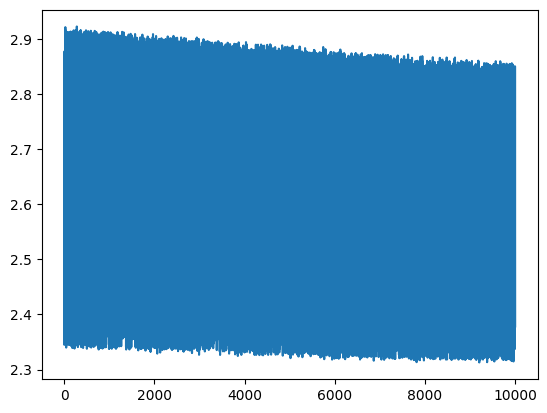

In [98]:
import matplotlib.pyplot as plt
plt.plot(loss_array)
plt.show()

In [99]:
import numpy as np
x_test = np.arange(-15, 15, 0.01)
x_test = torch.tensor(x_test).reshape(x_test.shape[0], 1).float()

y_test = model(x_test)

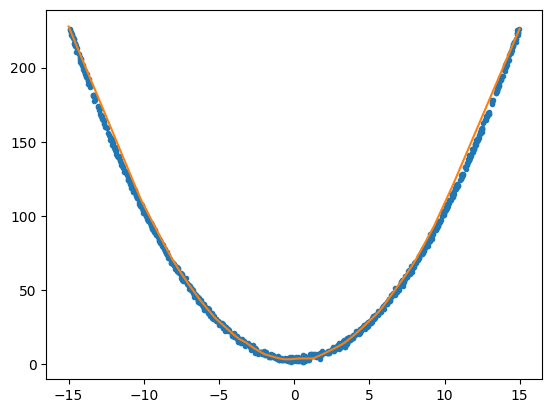

In [100]:
plt.plot(x, y_noise, '.')
plt.plot(x_test.detach().numpy(), y_test.detach().numpy())
plt.show()